In [1]:
#Import required libraries 
import yfinance as yf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.optimizers import Adam

In [2]:
stock_data = yf.download('AAPL', start='2012-01-01', end='2018-12-31') 
stock_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375391,12.413610,12.308283,12.320320,302220800
2012-01-04,12.441898,12.479215,12.316709,12.338376,260022000
2012-01-05,12.580026,12.595674,12.418724,12.487338,271269600
2012-01-06,12.711539,12.722072,12.615842,12.632393,318292800
2012-01-09,12.691372,12.872535,12.679936,12.804825,394024400


In [3]:
print(stock_data.shape)

(1759, 5)


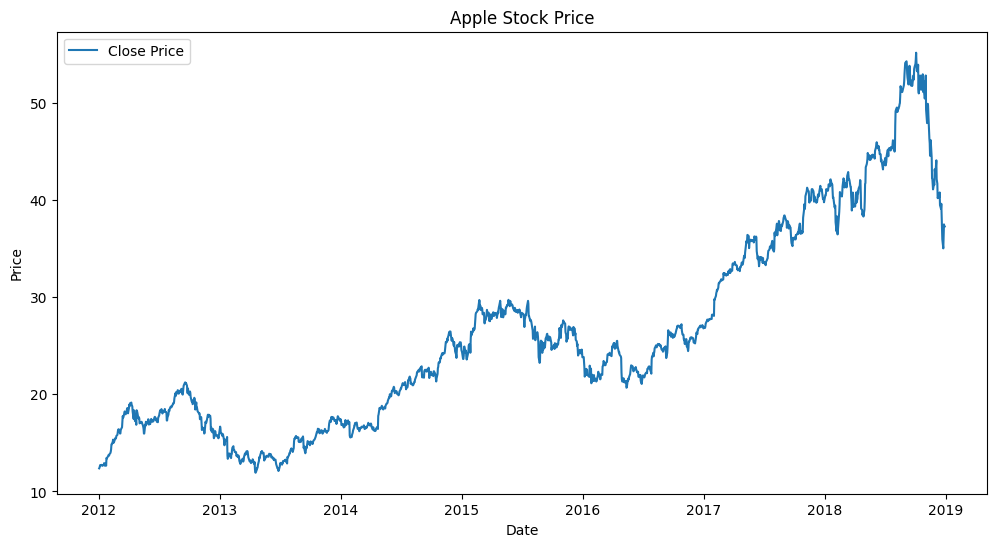

In [4]:
# Step 2: Visualize Closing Prices 
plt.figure(figsize=(12, 6)) 
plt.plot(stock_data['Close'], label='Close Price') 
plt.title('Apple Stock Price') 
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.legend() 
plt.show()

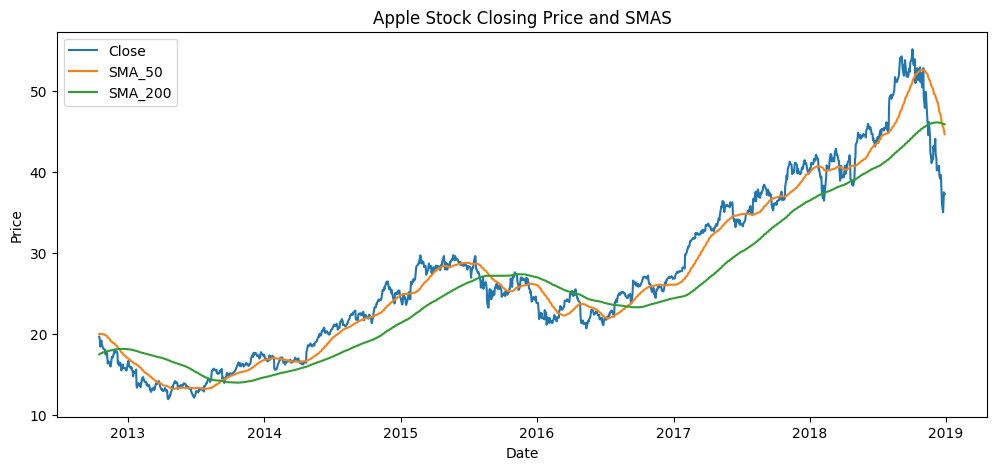

In [5]:
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean() 
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()
stock_data.dropna(inplace=True)
plt.figure(figsize=(12, 5)) 
plt.plot(stock_data['Close'], label='Close') 
plt.plot(stock_data['SMA_50'], label='SMA_50') 
plt.plot(stock_data['SMA_200'], label='SMA_200') 
plt.title('Apple Stock Closing Price and SMAS') 
plt.xlabel('Date') 
plt.ylabel('Price') 
plt.legend() 
plt.show()

In [6]:
stock_data.shape

(1560, 7)

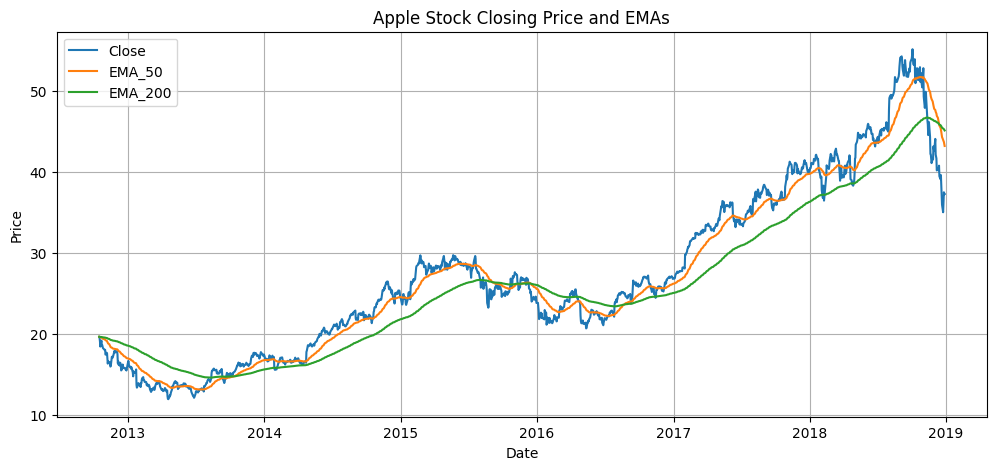

In [7]:
import matplotlib.pyplot as plt

# Calculate Exponential Moving Averages (EMA)
stock_data['ema_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()
stock_data['ema_200'] = stock_data['Close'].ewm(span=200, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(stock_data['Close'], label='Close') 
plt.plot(stock_data['ema_50'], label='EMA_50')  # Fixed Quotes
plt.plot(stock_data['ema_200'], label='EMA_200')  # Fixed Quotes

# Labels and Title
plt.title('Apple Stock Closing Price and EMAs')
plt.xlabel('Date')
plt.ylabel('Price')

# Legend
plt.legend()
plt.grid(True)  # Optional for better readability
plt.show()

In [8]:
stock_data.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,ema_50,ema_200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2012-10-16,19.638475,19.653890,19.070588,19.202663,549771600,19.972732,17.468802,19.638475,19.638475
2012-10-17,19.481922,19.729145,19.463486,19.610672,389037600,19.988662,17.504334,19.632336,19.636918
2012-10-18,19.120159,19.404857,19.040371,19.330208,476624400,19.997989,17.537726,19.612251,19.631776
2012-10-19,18.431084,19.093869,18.424434,19.072109,744086000,19.991407,17.566981,19.565930,19.619829
2012-10-22,19.162172,19.202973,18.458887,18.509057,546730800,19.998860,17.599234,19.550097,19.615275


In [9]:
# Define RSI Calculation Function
def rsi(stock_data, window=14): 
    delta = stock_data['Close'].diff()  # Price Difference
    gain = delta.where(delta > 0, 0)   # Positive gains
    loss = -delta.where(delta < 0, 0) # Negative losses (convert to positive)

    # Calculate average gain and average loss
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    # Relative Strength (RS) and RSI Calculation
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))  # Correct RSI formula

    stock_data['RSI'] = rsi  # Add RSI to the DataFrame
    return stock_data

In [10]:
stock_data.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,ema_50,ema_200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2012-10-16,19.638475,19.653890,19.070588,19.202663,549771600,19.972732,17.468802,19.638475,19.638475
2012-10-17,19.481922,19.729145,19.463486,19.610672,389037600,19.988662,17.504334,19.632336,19.636918
2012-10-18,19.120159,19.404857,19.040371,19.330208,476624400,19.997989,17.537726,19.612251,19.631776
2012-10-19,18.431084,19.093869,18.424434,19.072109,744086000,19.991407,17.566981,19.565930,19.619829
2012-10-22,19.162172,19.202973,18.458887,18.509057,546730800,19.998860,17.599234,19.550097,19.615275


In [11]:
# Calculate RSI
stock_data = rsi(stock_data)

# Drop NaN values
stock_data.dropna(inplace=True)

In [12]:
stock_data.head()

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200,ema_50,ema_200,RSI
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2012-11-06,17.615362,17.853820,17.531949,17.838408,374917200,19.726963,17.838836,19.089596,19.481092,26.150824
2012-11-07,16.941355,17.443523,16.873042,17.422270,793648800,19.664903,17.859231,19.005351,19.455821,22.565041
2012-11-08,16.326546,17.069780,16.251859,17.021202,1056146000,19.583015,17.877606,18.900300,19.424684,20.640764
2012-11-09,16.609205,16.846627,16.204191,16.407609,929913600,19.507312,17.893444,18.810453,19.396669,26.287747
2012-11-12,16.480774,16.835085,16.353865,16.824458,515802000,19.429844,17.908945,18.719093,19.367655,29.400993


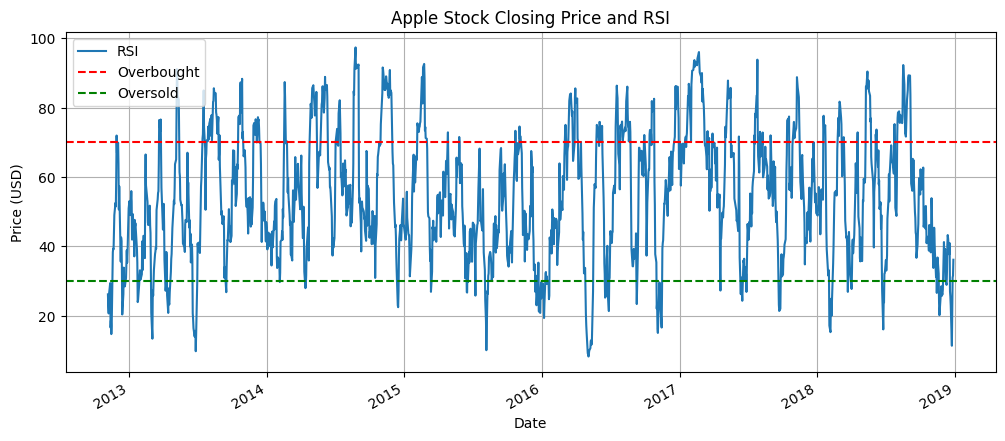

In [13]:
# Plot Closing Price and RSI
plt.figure(figsize=(12, 5))
stock_data['RSI'].plot(figsize=(12, 5))

plt.title('Apple Stock Closing Price and RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought')  # Overbought Line
plt.axhline(30, color='green', linestyle='--', label='Oversold') # Oversold Line

plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.legend()
plt.grid(True)
plt.show()

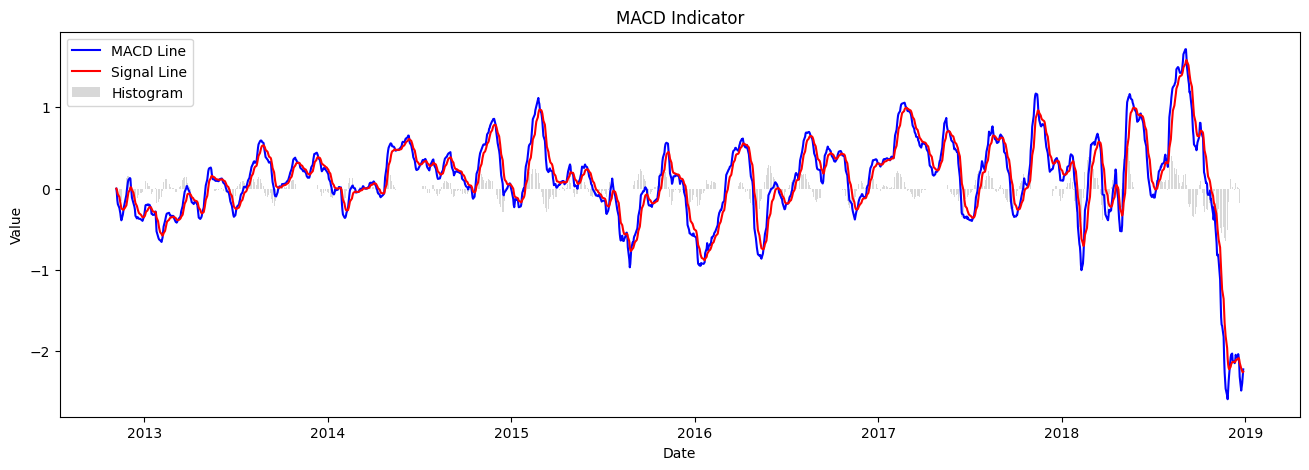

In [14]:
# Function to calculate MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    # Calculate the short and long EMAs
    data['ema_short'] = data['Close'].ewm(span=short_window, adjust=False).mean()
    data['ema_long'] = data['Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate the MACD line (difference between short and long EMA)
    data['macd'] = data['ema_short'] - data['ema_long']

    # Calculate the signal line (EMA of the MACD line)
    data['signal'] = data['macd'].ewm(span=signal_window, adjust=False).mean()

    # Calculate the histogram (MACD - signal line)
    data['histogram'] = data['macd'] - data['signal']

    return data

# Assuming `stock_data` is a DataFrame with the 'Close' column
stock_data = calculate_macd(stock_data)

# Plotting the MACD, Signal Line, and Histogram
plt.figure(figsize=(16, 5))
plt.plot(stock_data['macd'], label='MACD Line', color='blue')
plt.plot(stock_data['signal'], label='Signal Line', color='red')
plt.bar(stock_data.index, stock_data['histogram'], label='Histogram', color='gray', alpha=0.3)

plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

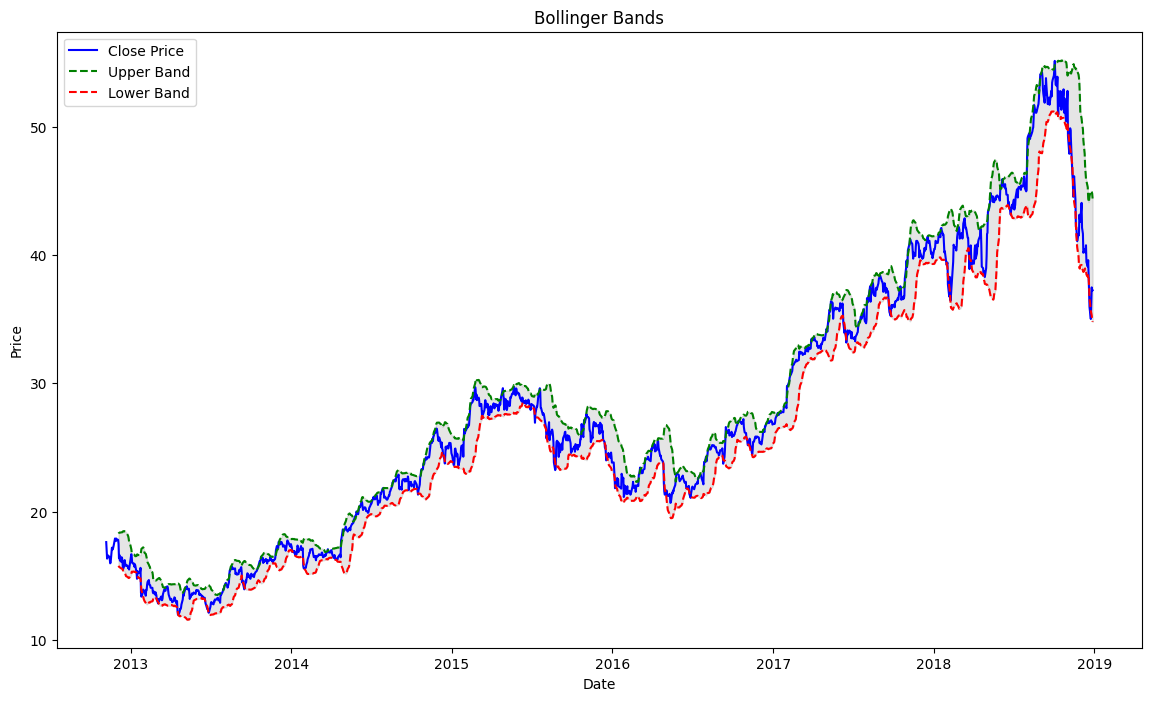

In [15]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    # Calculate the Middle Band (Simple Moving Average)
    data['Middle Band'] = data['Close'].rolling(window=window).mean()

    # Calculate the Rolling Standard Deviation
    data['Rolling Std Dev'] = data['Close'].rolling(window=window).std()

    # Calculate the Upper and Lower Bands
    data['Upper Band'] = data['Middle Band'] + (2 * data['Rolling Std Dev'])
    data['Lower Band'] = data['Middle Band'] - (2 * data['Rolling Std Dev'])

    # Drop the 'Rolling Std Dev' column
    data.drop(columns=['Rolling Std Dev'], inplace=True)

    return data

# Assuming `stock_data` is a DataFrame with the 'Close' column
stock_data = calculate_bollinger_bands(stock_data)

# Plotting the Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['Upper Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(stock_data['Lower Band'], label='Lower Band', color='red', linestyle='--')

# Fill the area between the upper and lower bands
plt.fill_between(stock_data.index, stock_data['Upper Band'], stock_data['Lower Band'], color="gray", alpha=0.2)

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

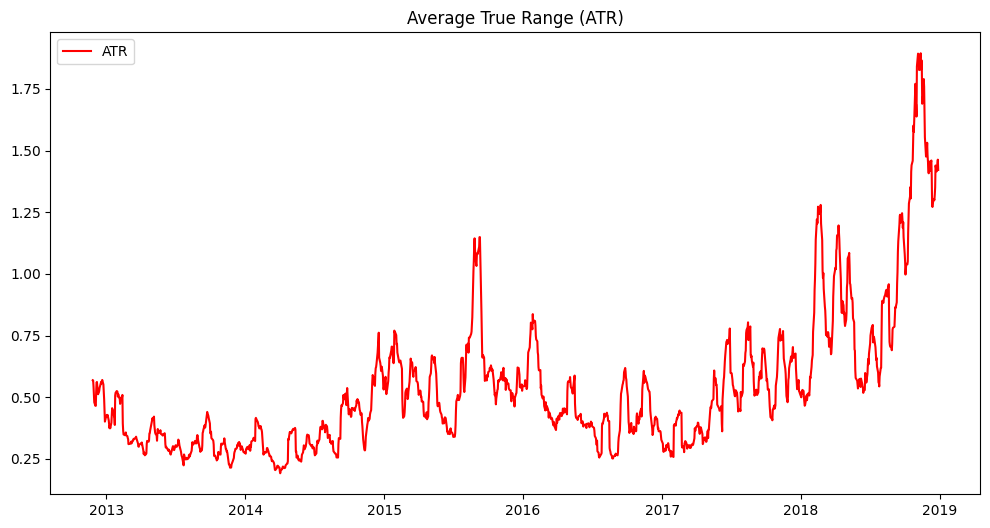

In [16]:
# Function to calculate Average True Range (ATR)
def calculate_atr(data, window=14):
    # Calculate True Range components
    data['High-Low'] = data['High'] - data['Low']
    data['High-Close'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-Close'] = abs(data['Low'] - data['Close'].shift(1))
    
    # Calculate the True Range
    data['True Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    
    # Calculate the Average True Range (ATR) using rolling mean
    data['ATR'] = data['True Range'].rolling(window=window).mean()

    return data

# Assuming `stock_data` is a DataFrame with 'High', 'Low', and 'Close' columns
stock_data = calculate_atr(stock_data)

# Plotting the ATR
plt.figure(figsize=(12, 6))
plt.plot(stock_data['ATR'], label='ATR', color='red')
plt.title("Average True Range (ATR)")
plt.legend()
plt.show()

In [17]:
# Calculating percentage change and price change between open and close
stock_data['pct_change'] = stock_data['Close'].pct_change()
stock_data['price_change_open_close'] = stock_data['Close'] - stock_data['Open']

# Creating target variable for the next day's closing price
stock_data['target'] = stock_data['Close'].shift(-1)

# Creating increment status (1 if price increased, 0 if price decreased)
stock_data['increment_status'] = (stock_data['Close'].shift(-1) > stock_data['Close']).astype(int)

# Dropping missing values (due to shifting)
stock_data.dropna(inplace=True)

# Features to be scaled
features_to_scale = [
    'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'ema_50', 'ema_200',
    'RSI', 'macd', 'signal', 'histogram', 'ATR', 'Middle Band', 'Upper Band', 'Lower Band',
    'pct_change', 'price_change_open_close'
]

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the selected features
stock_data[features_to_scale] = scaler.fit_transform(stock_data[features_to_scale])

# Checking the transformed data
print(stock_data.head())

Price          Close      High       Low      Open    Volume    SMA_50  \
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL             
Date                                                                     
2012-12-04 -0.960890 -0.958457 -0.956677 -0.943588  2.255660 -0.849499   
2012-12-05 -1.069397 -0.994896 -1.055229 -0.981331  5.480827 -0.858937   
2012-12-06 -1.044656 -1.041176 -1.114726 -1.098365  6.357778 -0.867317   
2012-12-07 -1.085616 -1.035688 -1.081136 -1.026744  3.776877 -0.875508   
2012-12-10 -1.095658 -1.084146 -1.106010 -1.109901  2.741291 -0.883406   

Price        SMA_200    ema_50   ema_200       RSI  ... Lower Band  High-Low  \
Ticker                                              ...                        
Date                                                ...                        
2012-12-04 -0.851669 -0.890041 -0.766091  0.492869  ...  -1.028356  0.293588   
2012-12-05 -0.850958 -0.896683 -0.769182 -0.227056  ...  -1.036045  0.925398   
2012-12

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Prepare your features (X) and target (y)
X = stock_data.drop(columns=['increment_status', 'target'])  # X is your feature set
y = stock_data['increment_status']  # y is your target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that the data is in float32 format for training
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Initialize the RandomForestClassifier model
model = RandomForestClassifier()

# Train the model with the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and classification report
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.5065359477124183
Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.54      0.51       145
         1.0       0.54      0.47      0.50       161

    accuracy                           0.51       306
   macro avg       0.51      0.51      0.51       306
weighted avg       0.51      0.51      0.51       306



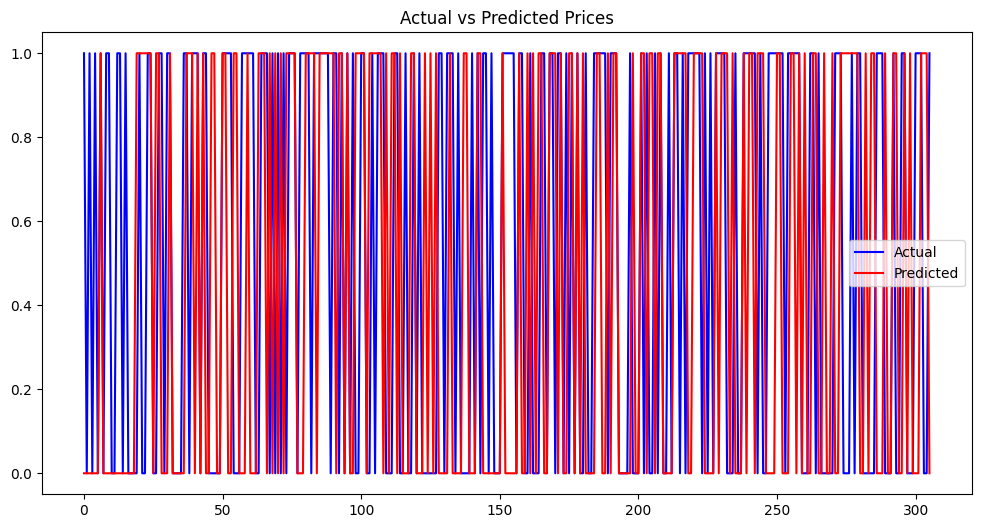

In [19]:
# Plotting Actual vs Predicted prices
plt.figure(figsize=(12, 6))  # Adjusted the size for better visibility
plt.plot(y_test.values, label='Actual', color='blue')  # y_test.values for actual prices
plt.plot(y_pred, label='Predicted', color='red')  # y_pred for predicted values
plt.title('Actual vs Predicted Prices')  # Corrected title syntax
plt.legend()
plt.show()

In [20]:
# Prepare your features (X) and target (y)
X = stock_data.drop(columns=["increment_status", "target"])  # Corrected 'increament_status' to 'increment_status'
y = stock_data['target']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the data is in float32 format
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Reshaping the data for LSTM (LSTM expects 3D input)
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1]).astype(np.float32)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1]).astype(np.float32)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=25))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss="mean_squared_error")

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32)

C:\Users\ameya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 329.2869
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.6796
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.8893
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.5285
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.2412 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.7880
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 10.9104
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.0375
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7464
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 10.8794
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.6727
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 10.0464
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.8703
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13.5213
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

In [21]:
# Make predictions using the trained model
y_predict = model.predict(X_test_reshaped)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)

# Calculate the R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_predict)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Mean Absolute Error: 0.902786374092102
Mean Squared Error: 1.3396260738372803
R-squared: 0.9873475432395935


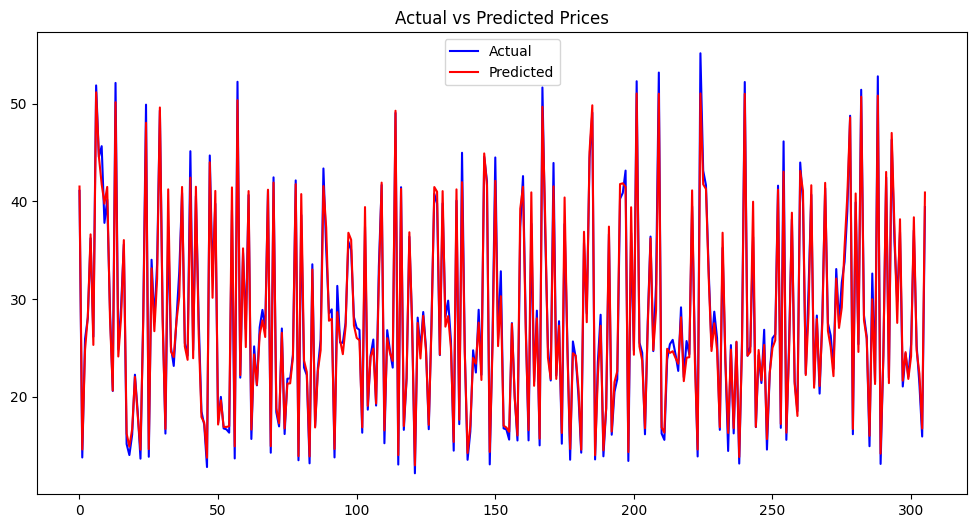

In [22]:
# Plotting Actual vs Predicted prices
plt.figure(figsize=(12, 6))  # Adjusted the size for better visibility
plt.plot(y_test.values, label='Actual', color='blue')  # y_test.values for actual prices
plt.plot(y_predict, label='Predicted', color='red')  # y_pred for predicted values
plt.title('Actual vs Predicted Prices')  # Corrected title syntax
plt.legend()
plt.show()

In [23]:
# Import necessary libraries
import xgboost
from xgboost import XGBRegressor  # Correct import statement

# Instantiate the XGBRegressor model
model = XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)  # Corrected variable name to y_train

# Make predictions on the test data
y_predi = model.predict(X_test)  # Corrected to use y_pred for predictions

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE)
mre = mean_absolute_error(y_test, y_predi)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predi)

# Calculate the R-squared score (R²)
r2 = r2_score(y_test, y_predi)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mre}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.4179984927177429
Mean Squared Error: 0.42565250396728516
R-squared: 0.9959797859191895


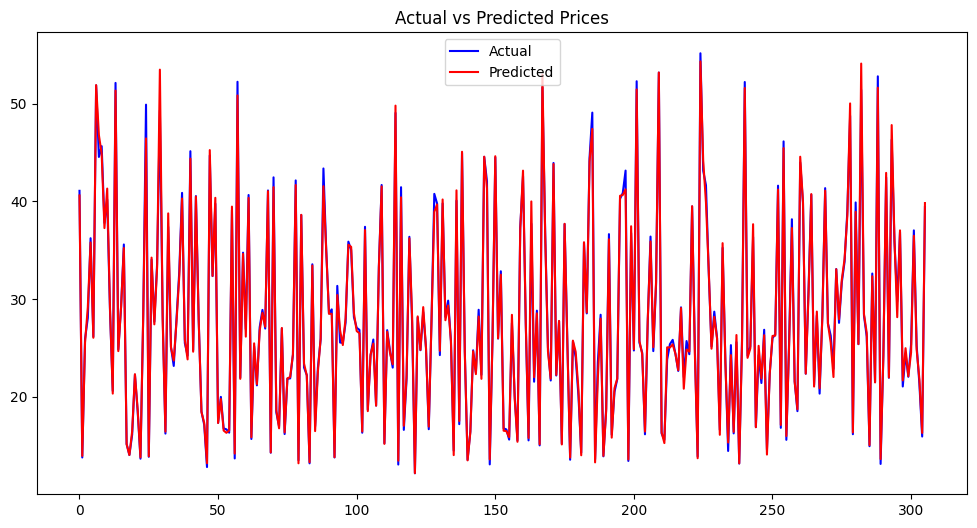

In [25]:
# Plotting Actual vs Predicted prices
plt.figure(figsize=(12, 6))  # Adjusted the size for better visibility
plt.plot(y_test.values, label='Actual', color='blue')  # y_test.values for actual prices
plt.plot(y_predi, label='Predicted', color='red')  # y_pred for predicted values
plt.title('Actual vs Predicted Prices')  # Corrected title syntax
plt.legend()
plt.show()